In [25]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [23]:
#callbask for early stop when loss not changing
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training=True
mycallback = Callback()
    

In [3]:
mnist = keras.datasets.fashion_mnist

(train_image,train_label), (test_image,test_label) = mnist.load_data()


In [ ]:
plt.imshow(train_image[5])


In [9]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_image,train_label,epochs=10,callbacks=[mycallback])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0842 - accuracy: 0.6633
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6387 - accuracy: 0.7693
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5650 - accuracy: 0.7969
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5233 - accuracy: 0.8153
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4959 - accuracy: 0.8255
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4761 - accuracy: 0.8322
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4605 - accuracy: 0.8383
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4481 - accuracy: 0.8412
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4386 - accuracy: 0.8454
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.429

In [16]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.4615 - accuracy: 0.8336


[0.46152061223983765, 0.8335999846458435]

313/313 [==============================] - 0s 998us/step
[2.4441124e-05 4.2751285e-06 7.7163706e-05 1.0943853e-04 5.3608601e-05
 9.8972976e-01 1.1189552e-04 8.6690169e-03 8.6045032e-04 3.5993053e-04]
5


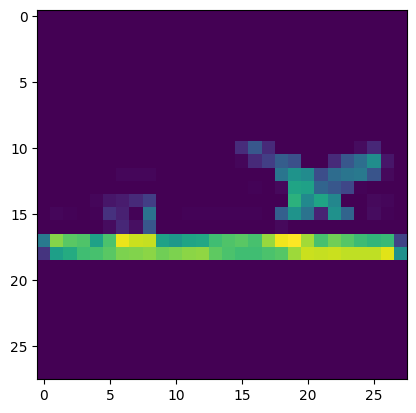

In [21]:
classification = model.predict(test_image)
plt.imshow(test_image[90])
print(classification[90])
print(test_label[90])